# HistGradientBoostingRegressor

## Importing the corresponding libraries

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_predict



In [2]:
#Importing the csv to Jupyter Notebook
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


# Correlation table (Raw Data)

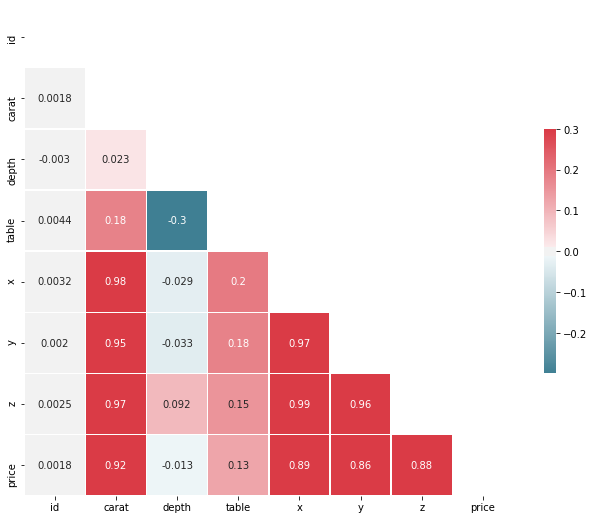

In [3]:
corr = training_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

# Cleaning Data

### Column 'color'

In [4]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    training_df['color'] = training_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


## Column 'clarity'

In [5]:
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    
    training_df['clarity'] = training_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


In [6]:
diamonds_new = pd.get_dummies(training_df)
diamonds_new.head()

,id,carat,color,clarity,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0.78,4,4,61.5,58.0,5.93,5.98,3.66,3446,0,0,0,1,0
1,1,0.31,6,2,60.8,56.0,4.37,4.32,2.64,732,0,0,1,0,0
2,2,0.30,4,2,62.3,54.0,4.30,4.34,2.69,475,0,0,1,0,0
3,3,1.04,5,5,62.0,58.0,6.54,6.46,4.03,9552,0,0,1,0,0
4,4,0.65,0,2,61.4,55.0,5.58,5.62,3.44,1276,0,0,1,0,0


In [7]:
X = diamonds_new.drop(columns=['id','x','y','z','price'])
y = diamonds_new['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
regressor = HistGradientBoostingRegressor()
regressor.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [10]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.9852878178344812
0.9791239040317489


In [11]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test, regressor.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print('MAE', mean_absolute_error(y_test, regressor.predict(X_test)))
print('R2', r2_score(y_test, regressor.predict(X_test)))

*** METRIC SUMMARY ***
MSE 331612.0762700452
RMSE 575.8576875149321
MAE 293.46398791563865
R2 0.9791239040317489


### Repetir los pasos con el 100% de los datos

In [12]:
regressor.fit(X, y)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

### Importamos el test

In [13]:
#Importing the csv to Jupyter Notebook
test_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_test.csv")
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


### Repetir la limpieza que hemos hecho antes de entrenar el modelo

In [14]:
X_test = pd.get_dummies(test_df)
X_test.head()

,id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.10,62.2,58.0,6.69,6.60,4.13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.51,62.5,57.0,5.07,5.10,3.18,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,2,2.03,61.9,59.0,8.14,8.09,5.02,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.21,60.0,60.0,6.96,6.91,4.16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,0.55,61.8,55.0,5.27,5.22,3.24,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [15]:
X_test = X_test.drop(columns=['id','x','y','z'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
y_pred = regressor.predict(X_test)

# Crear nuevo DataFrame

In [18]:
last_file = pd.DataFrame()
last_file['id'] = test_df['id']

In [19]:
last_file['price'] = pd.Series(y_pred)

In [20]:
last_file.to_csv('CSVs/HistGradientBoostingRegressor.csv',index = False)

# Visualización de los Datos

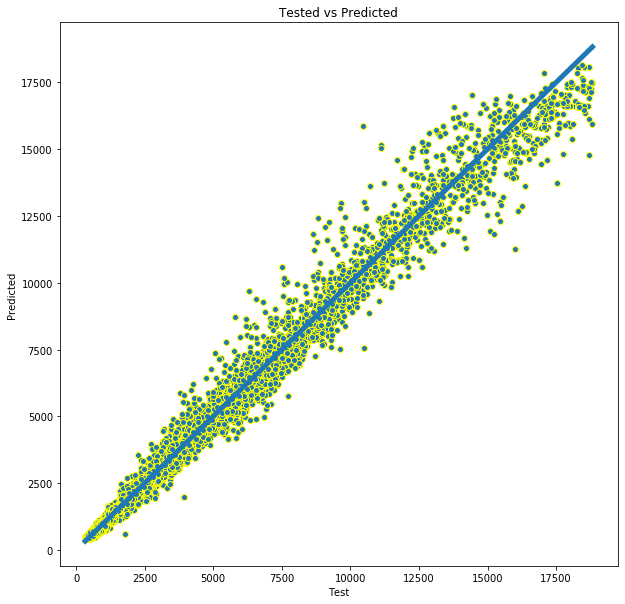

In [21]:
# run the model against the test data

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred, edgecolors='yellow')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', lw=5)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()